-236.0
-849.5
-2691.0


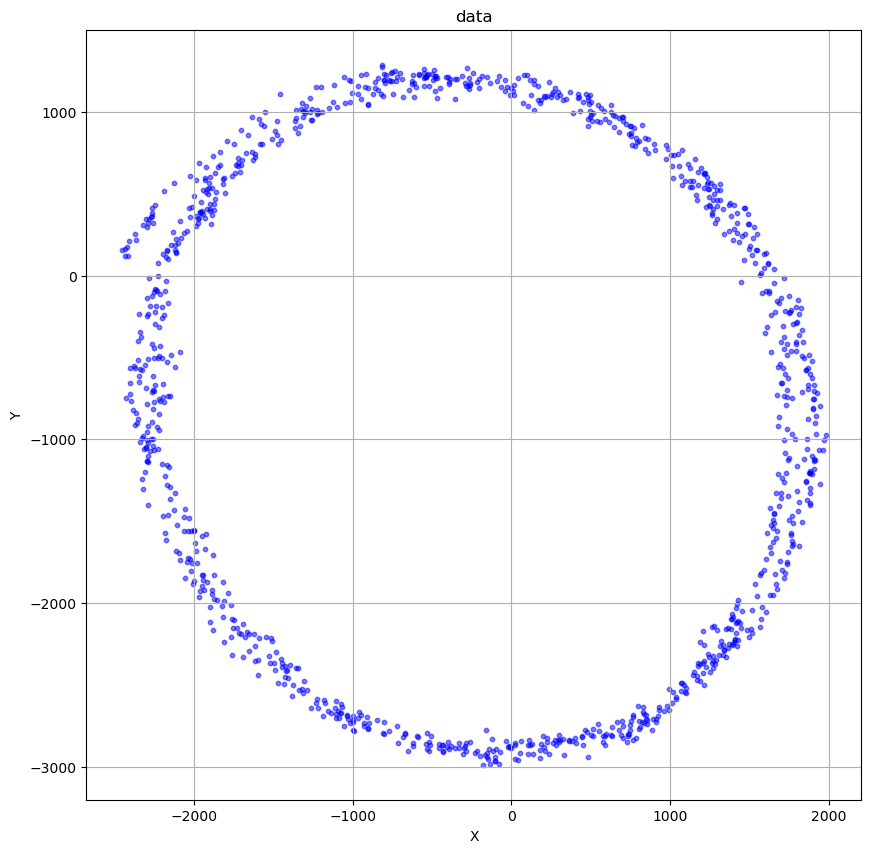

In [5]:
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as math

# CSVファイルを読み込む（ヘッダーがない場合）
# 列名を指定する（x, y, z）
df = pd.read_csv('data4.csv', header=None, names=['x', 'y', 'z'])
offX = np.max(df['x'])+np.min(df['x'])
offY = np.max(df['y'])+np.min(df['y'])
offZ = np.max(df['z'])+np.min(df['z'])
print(offX/2)
print(offY/2)
print(offZ/2)

# プロットの設定
plt.figure(figsize=(10, 10))  # 図のサイズを設定
plt.scatter(df['x'], df['y'], s=10, alpha=0.5, color='blue')  # 散布図を描画
plt.title('data')  # タイトル
plt.xlabel('X')  # X軸ラベル
plt.ylabel('Y')  # Y軸ラベル
plt.grid(True)  # グリッドを表示
plt.show()  # 図を表示

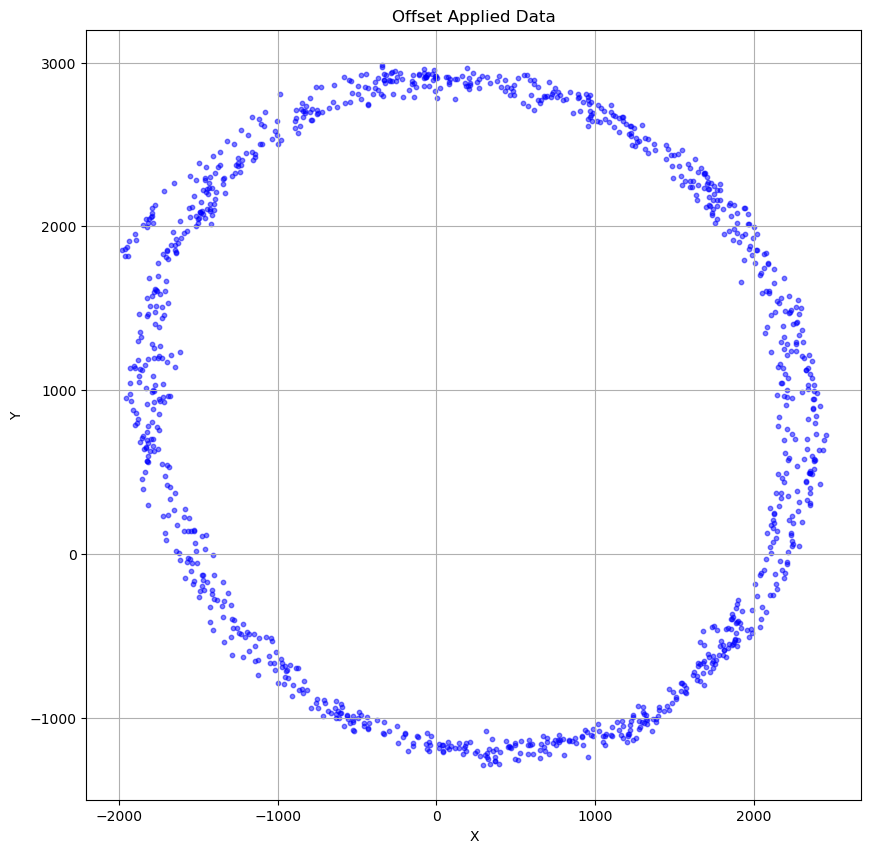

In [6]:
df_offset = pd.DataFrame({
    'x': df['x'] - offX,
    'y': df['y'] - offY,
    'z': df['z'] - offZ
})

# 結果を新しいCSVファイルに出力
df_offset.to_csv('offset.csv', index=False, header=False)

# 散布図をプロット
plt.figure(figsize=(10, 10))
plt.scatter(df_offset['x'], df_offset['y'], s=10, alpha=0.5, color='blue')
plt.title('Offset Applied Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [3]:
atan2 = []
for i in range(len(df_offset)):
    x = df_offset.loc[i, 'x']
    y = df_offset.loc[i, 'y']
    atan2.append(math.atan2(y, x))

df_offset['atan2'] = atan2

houi = ((2 / np.pi) - df_offset['atan2']) * (180 / np.pi)

# 負の値を360度加算して補正
houi = houi.where(houi >= 0, houi + 360)

df_offset['houi'] = houi

In [4]:
df_offset = pd.DataFrame({
    'x':houi
})

df_offset.to_csv('houi.csv', index=False, header=False)